In [1]:
from utils.glove import GloVe
from utils.word_sample import WordSample
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
 n_samples = 10000

glove = GloVe("glove/glove.6B.300d.txt")
words = WordSample("./words_alpha.txt", incl_words=glove.wordset, n_samples=n_samples).words

emb_vecs = glove.get_emb_vecs_of(words)
# build the data-matrix with shape = (n_samples, emb_dims)
X = np.array([emb_vecs[w] for w in words])
# normalize it
length = np.sqrt((X**2).sum(axis=1))[:, None]
X = X / length

Loaded the file: glove/glove.6B.300d.txt
Number of words: 400000
./words_alpha.txt has 370099 words.
# of words intersect with `incl_words`:  100776


In [3]:
gmm = GaussianMixture(n_components=10, verbose=1)
gmm.fit(X)

Initialization 0
Initialization converged: True


GaussianMixture(n_components=10, verbose=1)

In [4]:
labels = gmm.predict(X)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [15]:
pca.explained_variance_ratio_

array([0.04983082, 0.01634665], dtype=float32)

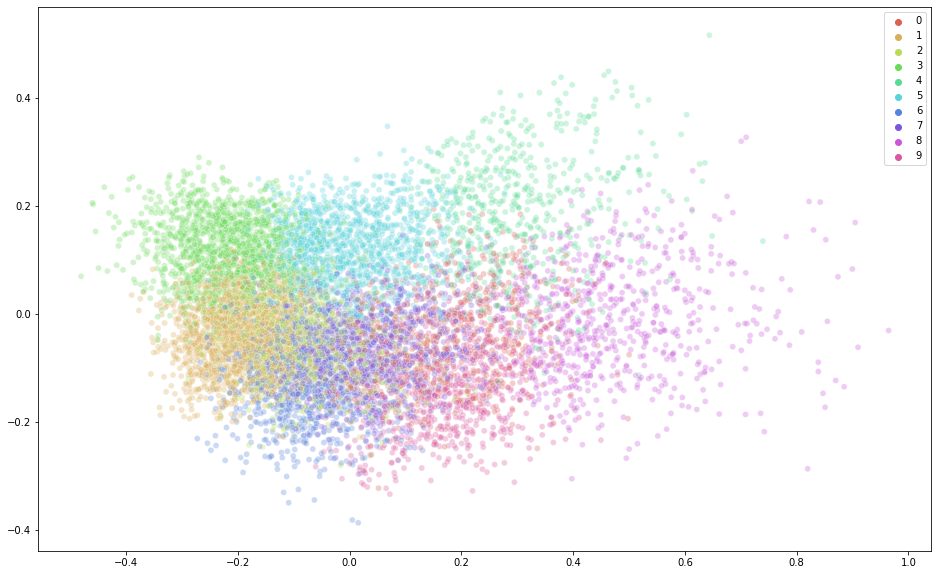

In [16]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    hue=labels,
    palette=sns.color_palette("hls", 10),
    alpha=0.3
)

In [10]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.332s...
[t-SNE] Computed neighbors for 10000 samples in 60.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.246898
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.763412
[t-SNE] KL divergence after 300 iterations: 4.142680
t-SNE done! Time elapsed

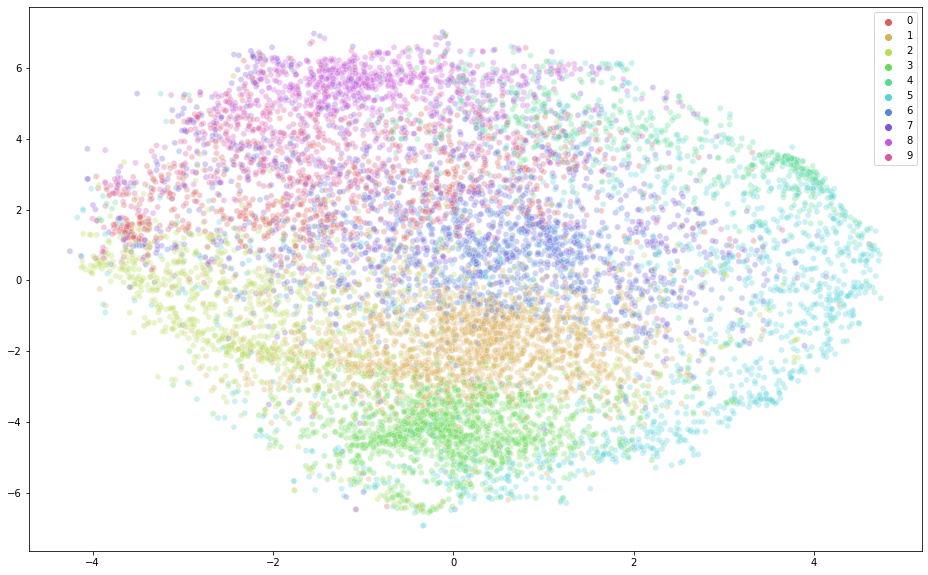

In [11]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=labels,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)